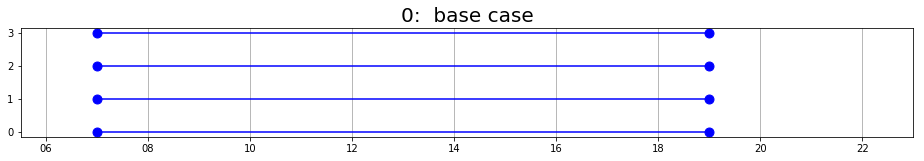

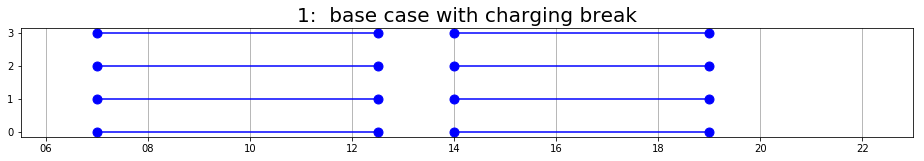

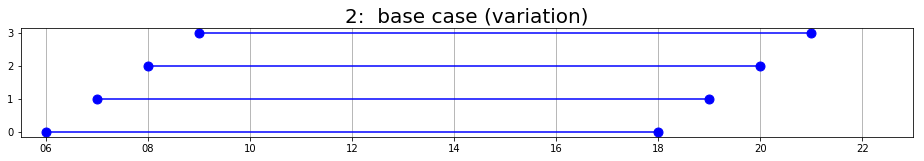

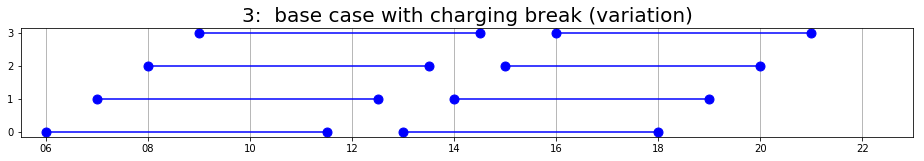

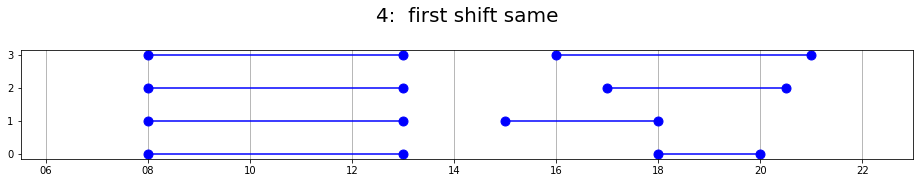

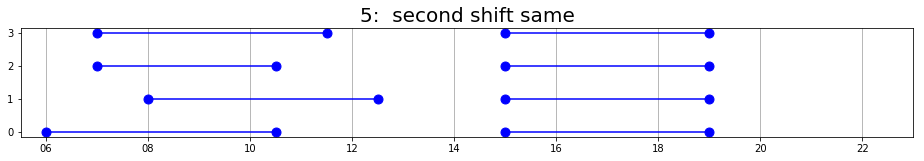

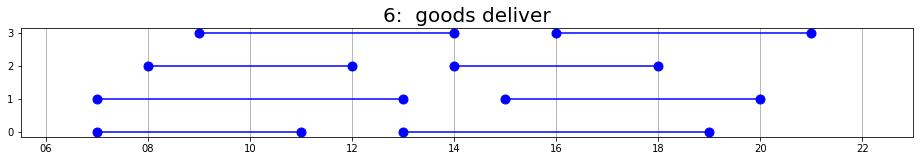

In [2]:
import pandas as pd
import numpy as np
import time as time_
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from chargingFunctions import *

fleetData = pd.read_csv("csv/fleetData.csv", sep=";", index_col=None)
fleetData = fleetData.loc[fleetData.index==0]
carData, chargePtData = getLists(fleetData)

#   Choose column names & Initialise dataframes
carCols = ["battkW","inDepot","battSize","chargePt","chargeRate","rcChunks","shiftIndex","latestStartShift","latestEndShift"]
carDataDF = pd.DataFrame.from_records(carData, columns=carCols)

shift_type = open("csv/schedules/scenarios.txt","r").readlines()

for shift in range(7):
    allShiftsDF = pd.read_csv("csv/schedules/shift" + str(shift) + ".csv", sep=";", index_col=None)
    shiftsByCar = unpackShifts(carDataDF, allShiftsDF)

    fig, ax = plt.subplots(figsize=(16,2))
    ax.set_xlim([dt.datetime(2019,1,1,5,30), dt.datetime(2019,1,1,23,0)])
    ax.xaxis.grid(b=True, which='both', color='0.65', linestyle='-')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

    if shift==4:  ax.set_title(str(shift) + ': ' + shift_type[shift][8:], fontsize=20)
    else:         ax.set_title(str(shift) + ': ' + shift_type[shift][8:-1], fontsize=20)

    for i in range(4):
        carShift = shiftsByCar[str(i)]
        for j in range(len(carShift)):
            times = np.array([readTime(carShift.iloc[j,0]),readTime(carShift.iloc[j,1])])
            ax.plot(times, np.full(2,i), 'bo-', markerSize=9)